<a href="https://colab.research.google.com/github/NegoitaAdrian18/Tensorflow_projects/blob/main/4_1_Transfer_Learning_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Referinte**

https://paperswithcode.com/



### **Tranfer Learning with TensorFlow part. 1: Feature Extraction

Transfer learning is leveraging a working model's existing architecture and learned patterns for  our own problem.

There are 2 main benefits:

  1. Can leverage an existing neural network architecture proven to work on problems similar to our own. 
  2. Can leverage a working neural network architecture which has already learned patterns on similar data to our own, then we can adapt those patterns to our own data. 

In [ ]:
# Check if i'm using the GPU:

!nvidia-smi

Tue Aug  9 11:44:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

> **Download and prepare the data**

- Get data (10 % of 10 food classes from Food101 ) 

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


# Unzip the downloaded file 

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()


--2022-08-09 11:44:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.130.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   174MB/s    in 0.9s    

2022-08-09 11:44:11 (174 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Inspect the data

import os 

# Walk through 10 percent data directory and list number of files

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/test
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 10 directori

** Preparing the data 

- I'll use the ImageDataGenerator class to load in our images in batches.

In [ ]:
# Setup data inputs

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Voi defini Hyper-parametrii:

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

train_dir = "10_food_classes_10_percent/train/"      # Definesc directorul cu date de antrenament
test_dir = "10_food_classes_10_percent/test/"         # Definesc directorul cu date de test

train_datagen = ImageDataGenerator(rescale=1/255.)    # Normalizez datele de antrenament
test_datagen = ImageDataGenerator(rescale=1/255.)     # Normalizez datele de test


print("Training images: ")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print("Test images: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")




Training images: 
Found 750 images belonging to 10 classes.
Test images: 
Found 2500 images belonging to 10 classes.


> **Setting up callbacks (things to run whil our model trains)

Callbacks are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks:

* Tracking experiments with the TensorBoard callback;
* Model checlpoint with the ModelCheckpoint callback;
* Stopping a model from trainig (before it trains to loong and overfits) with the EarlyStopping callback
* etc. 

-- Verifica in documentatie: tf.keras.callbacks.Callback



** Create TensorBoard callback ( functionized because we need to create a new one for each model )**


In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # This will creating a directory path of where to store
  # So the directory path is going to be directory name / the subdirectory with the experiment name / The date time. 

  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


### **Creating models using TensorFlow HUB**

> I used TensorFlow to create my own models layer by layer from scratch.

> Now i'm going to do a similar process, except the majority of our model's layers are going to come from TensorFlow HUB. 

> I can access pretraind models on: https://tfhub.dev/

> Feature vector model link: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1


Compare the following 2 models

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


In [ ]:
# Import dependencies

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
IMAGE_SHAPE + ((3),)

(224, 224, 3)

In [ ]:
# Let' s make create a model() function to create a model from URL 

def create_model(model_url, num_classes=10):
  """
  Takes a TensorFlow HUB URL and creates a Keras Sequential model with it.

  Args: 
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.

  """

  # Download the pretrained model and save it as a Keras layer

  feature_extractor_layer = hub.KerasLayer(model_url,
                                            trainable=False, # freeze the already learned patterns
                                            name = "feature_extraction_layer",
                                            input_shape=IMAGE_SHAPE+(3,))
  
  # Create the model 

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation='softmax', name='output_layer')  # The only trainable parameters is the output layer. The only patterns that are going to train.
  ])

  return model


### **Creating and testing ResNet TensorFlow Hub Feature Extraction model**


In [ ]:
# Creata Resnet model 

resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_percent.num_classes)

In [ ]:
train_data_10_percent.num_classes

10

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# Compile the resnet_model

resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model 

resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data_10_percent),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                           experiment_name="resnet50v2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50v2/20220809-114425
Epoch 1/5
24/24 [==============================] - 35s 839ms/step - loss: 2.0226 - accuracy: 0.3307 - val_loss: 1.1930 - val_accuracy: 0.6168
Epoch 2/5
24/24 [==============================] - 16s 692ms/step - loss: 0.9278 - accuracy: 0.7093 - val_loss: 0.8479 - val_accuracy: 0.7292
Epoch 3/5
24/24 [==============================] - 16s 691ms/step - loss: 0.6409 - accuracy: 0.8067 - val_loss: 0.7620 - val_accuracy: 0.7516
Epoch 4/5
24/24 [==============================] - 16s 690ms/step - loss: 0.4919 - accuracy: 0.8613 - val_loss: 0.6866 - val_accuracy: 0.7800
Epoch 5/5
24/24 [==============================] - 16s 699ms/step - loss: 0.3821 - accuracy: 0.9160 - val_loss: 0.6551 - val_accuracy: 0.7896


# Create a function to plot the loss curves**

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

    Returns:
      Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title('Loss')
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="traininf_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.legend()


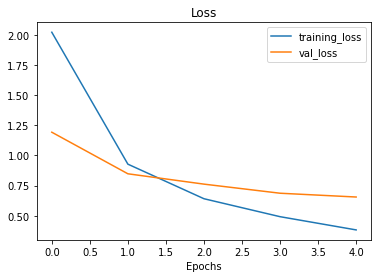

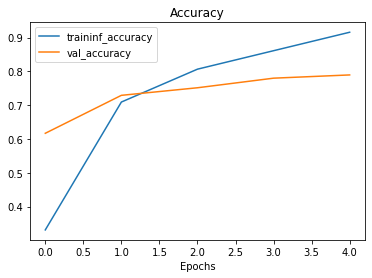

In [ ]:
plot_loss_curves(resnet_history)

### **Creating and testing EfficientNetB0 TensorFlow Hub Feature Extraction model**


In [ ]:
from gc import callbacks
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data_10_percent.num_classes)

# Compile the model
efficientnet_model.compile(loss="categorical_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit the model 
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     experiment_name="efficientnetb0")])


Saving TensorBoard log files to: tensorflow_hub/efficientnetb0/20220809-115251
Epoch 1/5
24/24 [==============================] - 27s 739ms/step - loss: 1.8169 - accuracy: 0.4533 - val_loss: 1.2721 - val_accuracy: 0.7116
Epoch 2/5
24/24 [==============================] - 16s 706ms/step - loss: 1.0427 - accuracy: 0.7800 - val_loss: 0.8649 - val_accuracy: 0.8144
Epoch 3/5
24/24 [==============================] - 16s 678ms/step - loss: 0.7509 - accuracy: 0.8373 - val_loss: 0.6997 - val_accuracy: 0.8476
Epoch 4/5
24/24 [==============================] - 16s 668ms/step - loss: 0.6013 - accuracy: 0.8747 - val_loss: 0.6139 - val_accuracy: 0.8556
Epoch 5/5
24/24 [==============================] - 16s 666ms/step - loss: 0.5100 - accuracy: 0.8920 - val_loss: 0.5593 - val_accuracy: 0.8608


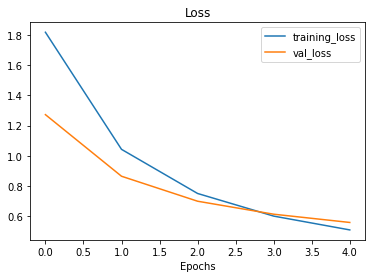

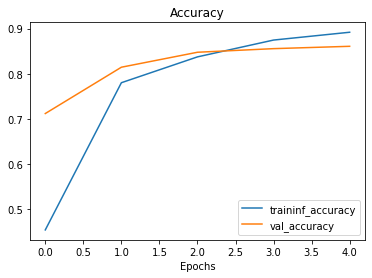

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# number of layers in the model 

efficientnet_model.layers

In [ ]:
# numbers of weights of the model 

#efficientnet_model.weights
len(efficientnet_model.weights)

311

## Difirent types of transfer learning

* **As is transfer learning** - using an existing model with no changes what so ever ( e.g. using ImageNet model on 1000 ImageNet classes, none of your own);

* **Feature extraction** transfer learning - use the prelearned patterns of an existing model ( e.g. EfficientNetB0 trained in ImageNet ) and adjust the output layer for your own problem (e.g. 1000 classes -> 10 classes of food);

* **Fine-tuning** transder learning - use the prelearned patterns of an existing model and "fine-tune" many or all of the underlying layers (including new output layers).

### **Comparing the models results using TensorBoard**

https://tensorboard.dev/


In [ ]:
# Upload the TensorBoard dev records

!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "EfficientNetB0 vs. ResNet50V2" \
--description "Comparing two different TF Hub feature extraction model architectures using 10% of the training data" \
--one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=NW3d8syUGpx0ts3qCF6IBHiziqmQAc&prompt=consent&access_type=off

The tensorboard experiments are uploaded at this adress: https://tensorboard.dev/experiment/Xtw787OIRLae1Ar8dudp5w/


In [ ]:
# Check the experiments 

!tensorboard dev list

https://tensorboard.dev/experiment/Xtw787OIRLae1Ar8dudp5w/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction model architectures using 10% of the training data
	Id                   Xtw787OIRLae1Ar8dudp5w
	Created              2022-08-09 12:23:35 (4 minutes ago)
	Updated              2022-08-09 12:23:40 (4 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  5918538
Total: 1 experiment(s)


In [ ]:
# Delete an experiment

#!tensorboard dev delete --experiment_id Xtw787OIRLae1Ar8dudp5w

In [ ]:
# Confirm the deletion by rechecking the experiments: 

#!tensorboard dev list